<a href="https://colab.research.google.com/github/Aravinda89/fastai_bootcamp/blob/main/BC2_1_MNIST__scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 24.8MB/s 
     |████████████████████████████████| 204kB 47.6MB/s 
     |████████████████████████████████| 1.2MB 37.5MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
Mounted at /content/gdrive


In [19]:
from fastai.vision.all import *
from fastbook import *
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rc('image', cmap='Greys')

In [4]:
#Load full MNIST dataset

path = untar_data(URLs.MNIST)    # Full dataset (0s to 9s)
Path.BASE_PATH = path

In [8]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [9]:
(path/'training').ls()

(#10) [Path('training/5'),Path('training/7'),Path('training/1'),Path('training/8'),Path('training/0'),Path('training/3'),Path('training/2'),Path('training/9'),Path('training/4'),Path('training/6')]

In [12]:
len((path/'training/5').ls())

5421

In [17]:
paths_dict = {}         # Create an empty dictionary to hold the paths list for each digit
num_imgs_dict = {}

for i in range(10):
    paths_dict[i] = (path/'training'/f"{i}").ls().sorted()   # add the list of path for digit i to the dict
    num_imgs_dict[i] = len((path/'training'/f"{i}").ls())

paths_dict

{0: (#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...],
 1: (#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...],
 2: (#5958) [Path('training/2/10009.png'),Path('training/2/10016.png'),Path('training/2/10024.png'),Path('training/2/10029.png'),Path('training/2/10072.png'),Path('training/2/10073.png'),Path('training/2/10075.png'),Path('training/2/10078.png'),Path('training/2/10081.png'),Path('training/2/10082.png')...],
 3: (#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/

In [16]:
for i in range(10):
    img_paths = paths_dict[i][10]
    img = Image.open(img_paths)
    display(img)

In [18]:
# Number of images for each class
num_imgs_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

([<matplotlib.axis.XTick at 0x7fb8c5a50e50>,
 <a list of 10 Text major ticklabel objects>)

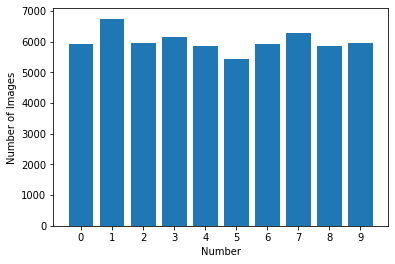

In [30]:
plt.bar(num_imgs_dict.keys(), num_imgs_dict.values(), label="Distribution")
plt.ylabel ('Number of Images')
plt.xlabel ('Number')
plt.xticks(list(num_imgs_dict.keys()))